# **EMAIL SPAM DETECTION WITH MACHINE LEARNING**

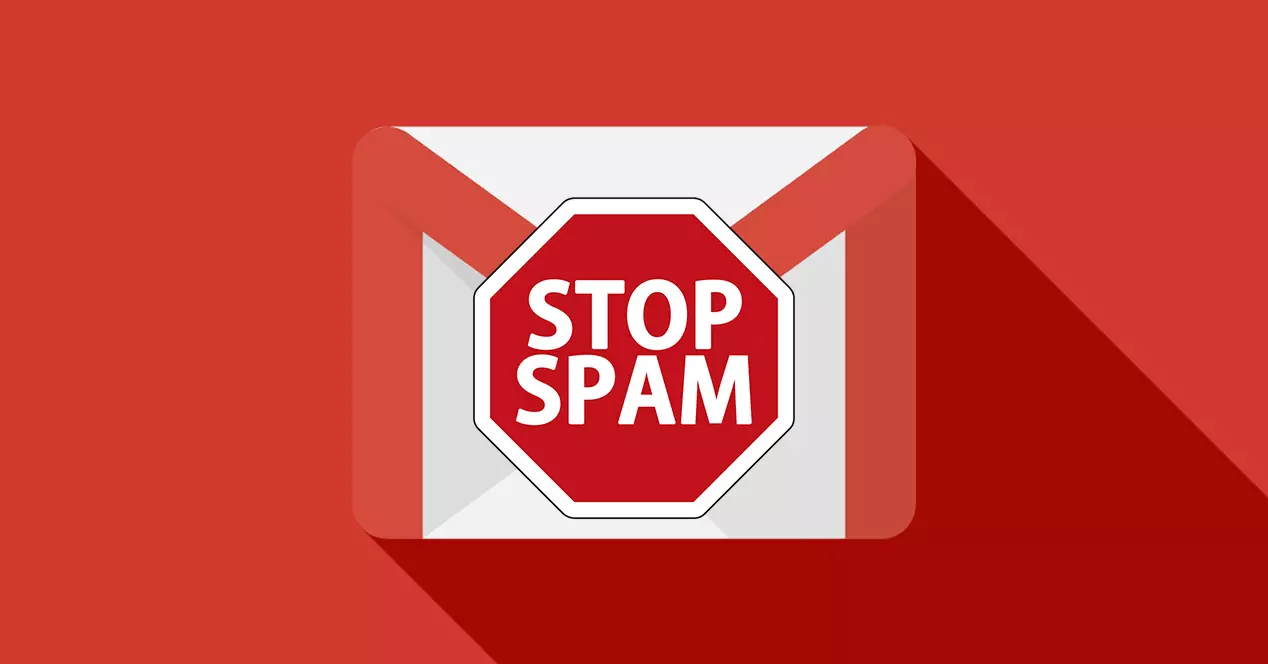



#Download **Dataset** here [EMAIL SPAM DETECTION](https://drive.google.com/file/d/19Yz5vBQ3T174xeSOOqVzw3rWWm39stsf/view?usp=share_link)

### Knowing about the Dataset

**Importing the Required Libraries**

In [88]:
# Numpy Library for Numerical Calculations
import numpy as np

# Pandas Library for Dataframe
import pandas as pd

# Matplotlib and for Plottings
import matplotlib.pyplot as plt

# Pickle Library for Saving the Model
import pickle

# RE Library for Regular Expression
import re

# NLTK Library for Natural Language Processing
import nltk
nltk.download('stopwords') # Downloading the Stopwords

# Stopwords for removing stopwords in the Text
from nltk.corpus import stopwords

# PorterStemmer for Stemming the Words
from nltk.stem.porter import PorterStemmer

# CountVectorizer for Bagging of Words and Vectorizing it
from sklearn.feature_extraction.text import CountVectorizer

# Train_Test_Split for splitting the Dataset
from sklearn.model_selection import train_test_split

# Decision Tree Classifier, Random Forest Classifier and Multinomial Naïve Bayes are Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# Accuracy Score and Confusion Matrix is for Analysis of Models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Reading informations in the Dataset**

In [89]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
spam = pd.read_csv("/content/cleaned2_data.csv", encoding='ISO-8859-1')

In [ ]:
import pandas as pd

# Load your data into a pandas DataFrame
df = pd.read_csv('/Final.spam.csv')

# Remove duplicate rows based on all columns
df.drop_duplicates(inplace=True)

# Save the cleaned data back to a file
df.to_csv('cleaned2_data.csv', index=False)

import pandas as pd

# Load your cleaned data into a pandas DataFrame
cleaned_df = pd.read_csv('cleaned2_data.csv')

# Display a sample row from the DataFrame
sample_row = cleaned_df.sample(1)
print(sample_row)

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 606-607: invalid continuation byte

**Checking for null values in Data**

In [91]:
spam.isnull().sum()

,0
v1,0
v2,0


**Checking the First Five Values in the Data**

In [92]:
spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Checking the Last Five Values in the Data**

In [93]:
spam.tail()

,v1,v2
7805,spam,"Claim Your Reward: Horticulturist, commercial ..."
7806,spam,Difficult thank treat newspaper impact. - Don'...
7807,spam,Set chair stop affect especially nor against. ...
7808,spam,Discover the Power of Media Today!
7809,spam,Vazquez-Reeves Announces Exclusive Discounts!


**Taking the required Columns in the Dataset**

In [94]:
spam = spam[['v1', 'v2']]
spam.columns = ['label', 'message']
spam.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


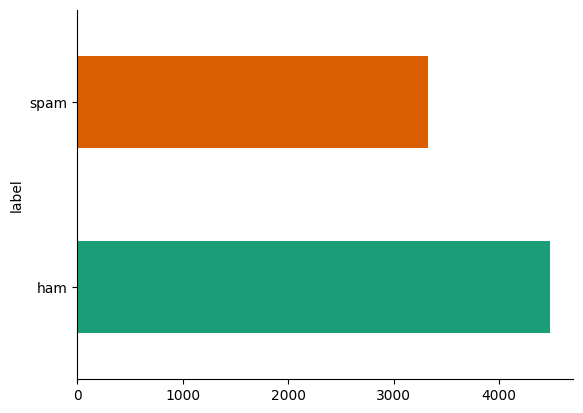

In [95]:
# @title label

from matplotlib import pyplot as plt
import seaborn as sns
spam.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

**Dimensions of the Dataset**

In [96]:
spam.shape

(7810, 2)

**Checking for the classes in the Data**

In [97]:
spam.groupby('label').size()

,0
label,
ham,4482
spam,3328


### Plotting

**Plotting the Label in the Dataset**

<Axes: xlabel='label'>

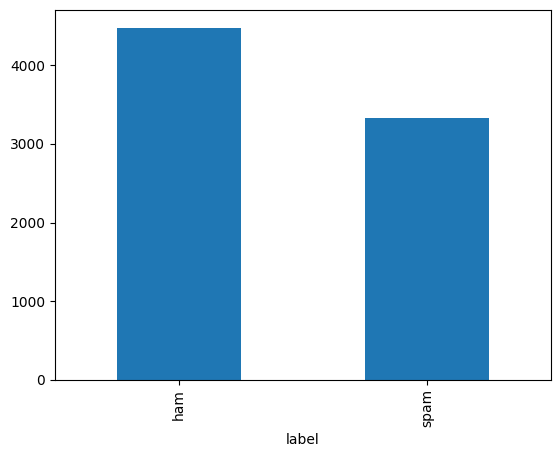

In [98]:
spam['label'].value_counts().plot(kind='bar')

### NLP

**Preprocessing the Text in the Dataset**

In [99]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(spam)):
    review = re.sub('[^a-zA-Z]', ' ', spam['message'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

# Printing the first 5 values in the corpus list
corpus[1:6]

['ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv']

**Creating Bag of Words Model**

In [100]:
cv = CountVectorizer(max_features = 4000)
X = cv.fit_transform(corpus).toarray()
Y = pd.get_dummies(spam['label'])
Y = Y.iloc[:, 1].values

### Data Modeling

**Splitting the Dataset into Training and Testing Set**

In [101]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=42)

### Model Building

**Creating the Models**

In [102]:
# Model 1 - Random Forest Classifier
model1 = RandomForestClassifier()
model1.fit(X_train, Y_train)

# Model 2 - Decision Tree Classifier
model2 = DecisionTreeClassifier()
model2.fit(X_train, Y_train)

# Model 3 - Multinomial Naïve Bayes
model3 = MultinomialNB()
model3.fit(X_train, Y_train)

MultinomialNB()

**Prediction**

In [103]:
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)

### Model Testing

**Testing the Model**

In [104]:
# Model 1 - Random Forest Classifier
print("Random Forest Classifier")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred1))
print("Accuracy: ", accuracy_score(Y_test, pred1))
print("--------------------------------")

# Model 2 - Decision Tree Classifier
print("Decision Tree Classifier")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred2))
print("Accuracy: ", accuracy_score(Y_test, pred2))
print("--------------------------------")

# Model 3 - Multinomial Naïve Bayes
print("Multinomial Naïve Bayes")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred3))
print("Accuracy: ", accuracy_score(Y_test, pred3))

Random Forest Classifier
Confusion Matrix: 
[[861  11]
 [ 53 637]]
Accuracy:  0.9590268886043534
--------------------------------
Decision Tree Classifier
Confusion Matrix: 
[[842  30]
 [ 54 636]]
Accuracy:  0.9462227912932138
--------------------------------
Multinomial Naïve Bayes
Confusion Matrix: 
[[841  31]
 [ 30 660]]
Accuracy:  0.9609475032010243


<Axes: >

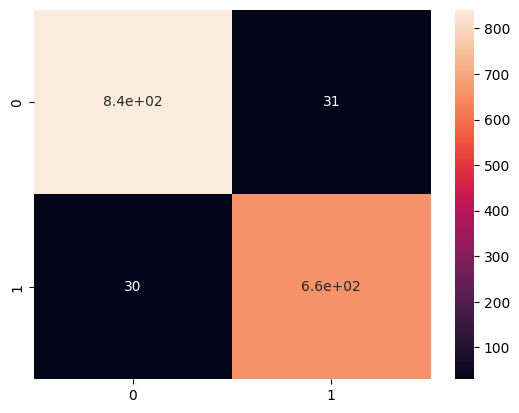

In [105]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred3)

import seaborn as sns
sns.heatmap(cm, annot=True)


In [106]:
from sklearn.metrics import classification_report

report1 = classification_report(Y_test, pred1)
print("Classification Report for RFC \n", report1)

report2 = classification_report(Y_test, pred2)
print("Classification Report for DTC \n", report2)

report3 = classification_report(Y_test, pred3)
print("Classification Report for MNB \n", report3)

Classification Report for RFC 
               precision    recall  f1-score   support

       False       0.94      0.99      0.96       872
        True       0.98      0.92      0.95       690

    accuracy                           0.96      1562
   macro avg       0.96      0.96      0.96      1562
weighted avg       0.96      0.96      0.96      1562

Classification Report for DTC 
               precision    recall  f1-score   support

       False       0.94      0.97      0.95       872
        True       0.95      0.92      0.94       690

    accuracy                           0.95      1562
   macro avg       0.95      0.94      0.95      1562
weighted avg       0.95      0.95      0.95      1562

Classification Report for MNB 
               precision    recall  f1-score   support

       False       0.97      0.96      0.97       872
        True       0.96      0.96      0.96       690

    accuracy                           0.96      1562
   macro avg       0.96      0.9

**Best Model is Multinomial Naïve Bayes**

### Saving Models

Saving all the Models

In [107]:
filename = "RFC.pkl"
pickle.dump(model1, open(filename, 'wb'))
filename = "DTC.pkl"
pickle.dump(model2, open(filename, 'wb'))
filename = "MNB.pkl"
pickle.dump(model3, open(filename, 'wb'))
print("Saved all Models")

Saved all Models


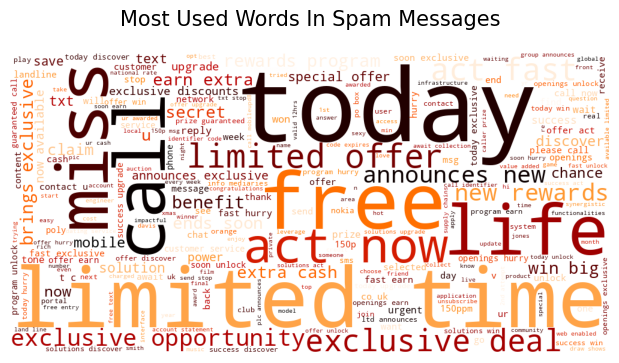

In [110]:
df_spam = spam[spam['label'] == 'spam'].copy()
comment_words = ''
stopwords = set(STOPWORDS)

for val in df_spam['message']:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens) + " "

wordcloud = WordCloud(width=1000, height=500, background_color='white', stopwords=stopwords, min_font_size=10, max_words=1000, colormap='gist_heat_r').generate(comment_words)

# Plotting the Word Cloud
plt.figure(figsize=(6, 6), facecolor=None)
plt.title('Most Used Words In Spam Messages', fontsize=15, pad=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# Display the Word Cloud
plt.show()